Заголовок:Статистический анализ данных
Описание проекта:Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках.
Цель исследования:Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Ход исследования:
1)Загрузка данных
2)Предобработка данных
3)Исследовательский анализ данных
4)Объединение данных
5)Подсчёт выручки
6)Проверка гипотез

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

Импорт всех нужный библиотек.

#### Шаг 1. Загрузка данных

In [2]:
data_users=pd.read_csv('/datasets/users_go.csv')
data_rides=pd.read_csv('/datasets/rides_go.csv')
data_subscription=pd.read_csv('/datasets/subscriptions_go.csv')
display(data_users.head())
data_users.info()
print()
display(data_rides.head())
data_rides.info()
print()
display(data_subscription.head())
data_subscription.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB



,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Сохранение csv файлов в DataFrame.

#### Шаг 2. Предобработка данных

In [3]:
data_rides['date']=pd.to_datetime(data_rides['date'], format='%Y-%m-%d')
data_rides['month']=data_rides['date'].dt.month

Изменяем тип данных у столбца date. А также создаём новый столбец month.

In [4]:
print(data_users.isna().sum())
print(data_rides.isna().sum())
print(data_subscription.isna().sum())
print(data_users.duplicated().sum())
print(data_rides.duplicated().sum())
print(data_subscription.duplicated().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
31
0
0


Проверяем DataFrame на наличие пропусков и дубликатов.

In [5]:
data_users=data_users.drop_duplicates().reset_index(drop=True)

Убираем дубликаты из первого DataFrame.

Вывод:во всех трёх DataFrame нету пропущенных значений. Но в первом DataFrame было обноружено 31 строка с дубликатами. Учитывая, что процентное соотношнеие строк с дубликатами ко всем строчкам маленькое, можно без проблем просто удалить эти строчки. Также был изменен тип столбца date с object64 на datetime. Ко всему прочему, был добавлен новый столбец, показывающий номер месяца.

#### Шаг 3. Исследовательский анализ данных

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

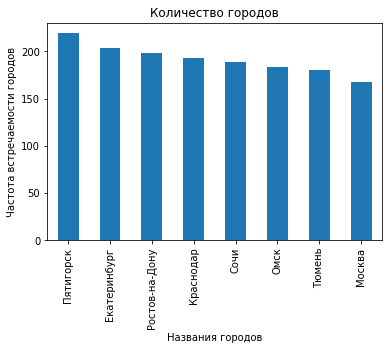

In [6]:
data_city=data_users['city'].value_counts()
data_city.columns=['city', 'count']
data_city.plot(x='city', y='count', kind='bar')
plt.title('Количество городов');
plt.xlabel('Названия городов');
plt.ylabel('Частота встречаемости городов');
data_users['city'].value_counts()

Вывод:больше всего пользователей самокатов в городе Пятигорск, далее Екатеринбург и Ростов на Дону.

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

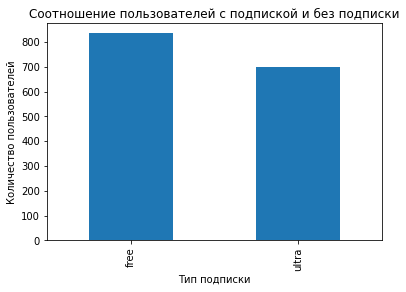

In [7]:
data_type=data_users['subscription_type'].value_counts()
data_type.columns=['subscription_type', 'count']
data_type.plot(x='subscription_type', y='count', kind='bar')
plt.title('Соотношение пользователей с подпиской и без подписки');
plt.xlabel('Тип подписки');
plt.ylabel('Количество пользователей');
data_users["subscription_type"].value_counts(normalize=True)

Вывод: Как можно заметить и по графику, и по значениям, больше всего пользователей без подписки(54.43%)

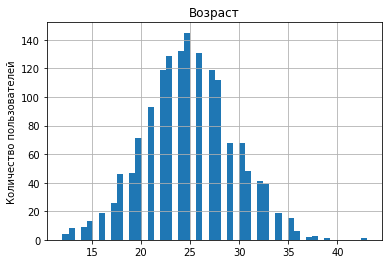

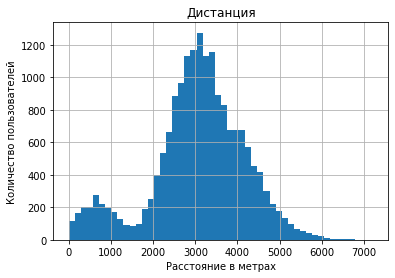

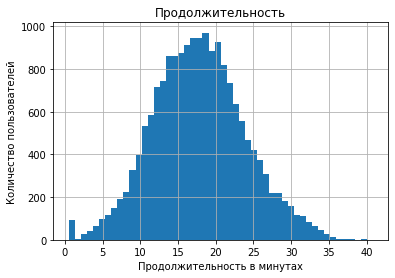

In [8]:
data_users.hist('age', bins=50);
plt.title('Возраст');
plt.ylabel('Количество пользователей');
data_rides.hist('distance', bins=50);
plt.title('Дистанция');
plt.xlabel('Расстояние в метрах');
plt.ylabel('Количество пользователей');
data_rides.hist('duration', bins=50);
plt.title('Продолжительность');
plt.xlabel('Продолжительность в минутах');
plt.ylabel('Количество пользователей');

Вывод:Чаще всего, возраст пользователей примерно равен 25 лет, они проезжают в среднем от 2500 до 3500 метров, и делают это в среднем за 15-20 минут.

#### Шаг 4. Объединение данных

In [9]:
data=data_users.merge(data_rides, on='user_id')
data=data.merge(data_subscription, on='subscription_type')
print(data.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Объединяем DataFrame и проверяем наличие пропусков.

In [10]:
data1=data.query('subscription_type=="ultra"')
data2=data.query('subscription_type=="free"')

Создаём 2 DataFrame, для пользователей с подпиской и без неё.

In [11]:
print(data.shape[0])
print(data1.shape[0]+data2.shape[0])

18068
18068


Проверяем размерность DataFrame. Всё сходится!

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,24.892615,3115.445388,18.541985,6.422308,6.0,0.0,199.0
std,201.099339,4.757208,836.895330,5.572048,3.414616,0.0,0.0,0.0
min,1.000000,12.000000,244.210438,3.760353,1.000000,6.0,0.0,199.0
25%,175.000000,22.000000,2785.444017,14.524654,4.000000,6.0,0.0,199.0
50%,351.000000,25.000000,3148.637229,18.178153,6.000000,6.0,0.0,199.0
75%,525.000000,28.000000,3560.574425,21.884129,9.000000,6.0,0.0,199.0
max,699.000000,38.000000,5699.769662,40.823963,12.000000,6.0,0.0,199.0


,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,24.893326,3045.495282,17.390909,6.522994,8.0,50.0,0.0
std,241.165628,4.481100,1246.173806,6.326803,3.449770,0.0,0.0,0.0
min,700.000000,12.000000,0.855683,0.500000,1.000000,8.0,50.0,0.0
25%,915.000000,22.000000,2366.562689,12.958437,4.000000,8.0,50.0,0.0
50%,1123.000000,25.000000,3114.648465,17.326890,7.000000,8.0,50.0,0.0
75%,1328.000000,28.000000,3905.697894,21.594071,9.000000,8.0,50.0,0.0
max,1534.000000,43.000000,7211.007745,34.948498,12.000000,8.0,50.0,0.0


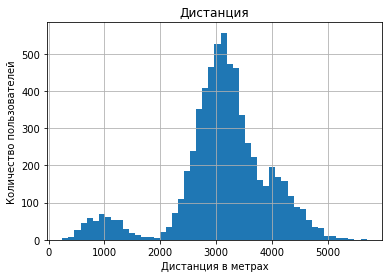

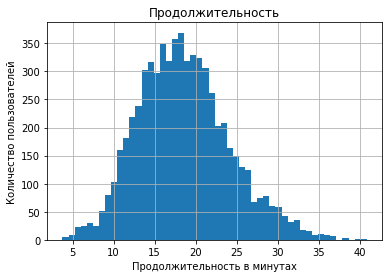

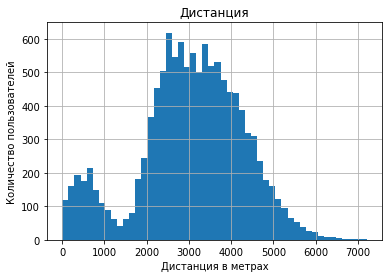

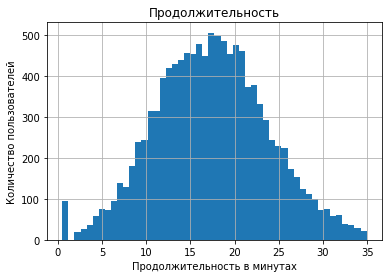

In [12]:
data1.hist('distance', bins=50);
plt.title('Дистанция');
plt.xlabel('Дистанция в метрах');
plt.ylabel('Количество пользователей');
data1.hist('duration', bins=50);
plt.title('Продолжительность');
plt.xlabel('Продолжительность в минутах');
plt.ylabel('Количество пользователей');
data2.hist('distance', bins=50);
plt.title('Дистанция');
plt.xlabel('Дистанция в метрах');
plt.ylabel('Количество пользователей');
data2.hist('duration', bins=50);
plt.title('Продолжительность');
plt.xlabel('Продолжительность в минутах');
plt.ylabel('Количество пользователей');
display(data1.describe())
data2.describe()

Вывод: как видно по графику, среднее расстояние, которое проезжают пользователи за поезду, у пользователй с подпиской составляет 3115 м., в то время как у пользователей без подписки оно состовляет 3045 м. продолжительность же равна 18 и 17 соответсвенно.

#### Шаг 5. Подсчёт выручки

In [13]:
data_user_rides=data.pivot_table(index=['user_id', 'month'], values=['distance', 'duration', 'name', 'subscription_type'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type':'max'})
data_user_rides.columns=['total_distance', 'total_duration', 'count', 'subscription_type']
data_user_rides['total_duration']=np.ceil(data_user_rides['total_duration'])
data_user_rides.loc[data_user_rides['subscription_type'] == 'ultra', 'money']=6*data_user_rides['total_duration']+199
data_user_rides.loc[data_user_rides['subscription_type'] == 'free', 'money']=8*data_user_rides['total_duration']+50*data_user_rides['count']
data_user_rides.head()

total_distance  total_duration  count subscription_type  money
user_id month                                                                
1       1         7027.511294            42.0      2             ultra  451.0
        4          754.159807             7.0      1             ultra  241.0
        8         6723.470560            45.0      2             ultra  469.0
        10        5809.911100            32.0      2             ultra  391.0
        11        7003.499363            54.0      3             ultra  523.0

Вывод: Я смог найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же DataFrame добавил новый столбец с выручкой от каждого клиента кажыдый месяц.

#### Шаг 6. Проверка гипотез

In [14]:
alpha = 0.05

results = st.ttest_ind(data1['duration'], data2['duration'], alternative = 'greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу.


Нулевая гипотеза-потраченное время у пользователей с подпиской и без неё равно.
Альтернативная гипотеза-потраченное время у пользователей с подпиской больше чем, у пользователей без неё.
Вывод: пользователи с подпиской арендуют самокат на большее время, чем пользователи без подписки.

In [15]:
results = st.ttest_1samp(data.loc[data['subscription_type']=='ultra', 'distance'], 3130, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 0.9195368847849785
Отвергаем нулевую гипотезу


Нулевая гипотеза - пользователи с подпиской проезжают за одну поездку не больше 3130 метров.
Альтернативная гипотеза - пользователи с подпиской проезжают за одну поездку больше 3130 метров.
Вывод:пользователи с подпиской проезжают за одну поездку не больше 3130 метров

In [16]:
results = st.ttest_ind(data_user_rides.loc[data_user_rides["subscription_type"] == 'ultra']['money'], data_user_rides.loc[data_user_rides["subscription_type"] == 'free']['money'], alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу.


Нулевая гипотеза-средняя выручка пользователей с подпиской и пользователей без неё равна.
Альтернативная гипотеза-средняя выручка пользователей с подпиской выше, чем у пользователей без неё.
Вывод:средняя выручка пользователей с подпиской выше, чем у пользователей без неё.

При решении подобной задачи лучше всего использовать проверку гипотезы о равенстве средних для зависимых выборок. То есть подойдёт метод st.ttest_rel()

### Общий вывод: 

Для начала я импортировал все библиотеки и открыл все csv файлы в DataFrame. После, проверил все 3 DataFrame на пропуски и дубликаты, и обработал все данные. 
    Также, был изменен тип столбца date с object64 на datetime. Ко всему прочему, был добавлен новый столбец, показывающий номер месяца. Дальше, был проведен исследовательский анализ данных:больше всего пользователей самокатов в городе Пятигорск, далее Екатеринбург и Ростов на Дону; больше всего пользователей не импользуют подписку(54.43%).
    Далее, я смог найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц(дистанцию проехали тоже примерно одинаково 3045 и 3115 метров. Продолжительность сессии 17 и 18 минут.). В этот же DataFrame добавил новый столбец с выручкой от каждого клиента кажыдый месяц. 
    Далее я проверил все гипотезы, составив для каждой нулевую и альтернативную гипотезу.
    Исходя из данных, полученных во время анализа данных, можно сказать, что число пользователей с подпиской и без не сильно отличаются. Но пользователи с подпиской приносят больше прибыли.